In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
seriesuid = 'xuyi'
clean = np.load(f'./{seriesuid}/{seriesuid}_clean.npy')
crop = np.load(f'./{seriesuid}/{seriesuid}_crop.npy')
pbb = np.load(f'./{seriesuid}/{seriesuid}_pbb.npy')

print(crop.shape, pbb.shape)

(36, 1, 96, 96, 96) (1, 36, 5)


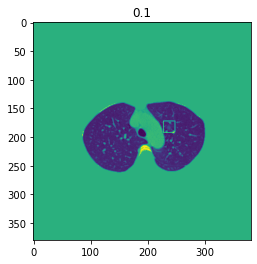

In [3]:
for idx in range(pbb.shape[1]):
    if pbb[0, idx, 0].item() > 0.04:
        fig = plt.figure()
        z, x, y = int(pbb[0,idx,1]), int(pbb[0,idx,2]), int(pbb[0,idx,3])

        data = np.array(clean[0, z, :, :])
        data[max(0,x-10):min(data.shape[0]-1,x+10), max(0,y-10)] = 255
        data[max(0,x-10):min(data.shape[0]-1,x+10), min(data.shape[1]-1,y+10)] = 255
        data[max(0,x-10), max(0,y-10):min(data.shape[1]-1,y+10)] = 255
        data[min(data.shape[0]-1,x+10), max(0,y-10):min(data.shape[1]-1,y+10)] = 255

        plt.title(round(pbb[0, idx, 0].item(), 3))
        plt.imshow(data)